## Geometric Objects - Spatial Data Model
The most fundamental geometric objects are **Points**, **Lines**, and **Polygons**.  
Python has `shapely` module that can be used to create and work with them.  
Examples of _geometric object operations_ are:
1. Create a *Line* or *Polygon* from a _Collection_ of *Points* geometries
2. Calculate areas/lengths/bounds etc. of input geometries
3. Make geometric operations based on the input geometries such as **Union**, **Difference**, **Distance** etc.
4. Make spatial queries between geometries such as **Intersects**, **Touches**, **Crosses**, **Within** etc.

### Geometric Objects Tuples
* **Point** : The coordinate tuple
* **LineString** : A list of at least two coordinate tuples
* **Polygon** : A list of at least three coordinate tuples that forms the outerior ring and a possible list of hole polygons (i.e the first and last element of the tuples must be the same)

#### Point

In [1]:
# import necessary module
from shapely.geometry import Point, LineString, Polygon

# create point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

# what is the type of the point?
point_type = type(point1)

In [2]:
print(point1)
print(point3D)
print(type(point1))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


#### Point Attributes and Functions

In [3]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

In [4]:
# Get the x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# What about y coordinate?
y = point1.y

In [5]:
# What is inside?
print(xy)
print(type(xy))
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
<class 'tuple'>
2.2
4.2


In [6]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


**Side note regarding GIS distance**  
Since earth is not a sphere but rather a 'geoid' (i.e. a bubbly space rock), then the most widely used distance approximation is ellipsoid "WGS84".

In [7]:
# with pyproj
import pyproj

geod = pyproj.Geod(ellps='WGS84')

angle1, angle2, distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

print("{0:8.4f} for ellipsoid WGS84 in km".format(distance/1000))

3286.3538 for ellipsoid WGS84 in km


### LineString

In [8]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [9]:
# let's see how our LineString looks like
print(line)
print(line2)
type(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


shapely.geometry.linestring.LineString

#### LineString attributes and functions

In [10]:
# Get x and y coordinates of the line
lxy = line.xy
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [11]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject
# by referring to an array at index 1
line_y = line.xy[1]

print(line_x)
print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [12]:
# Get the length of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


### Polygon

In [13]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)
print(poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


In [14]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at
# the boundaries of the world. Notice: there could be multiple holes,
# thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, 80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

In [15]:
# Let's see what we have now
print(world)
print(world_has_a_hole)
type(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

**Polygon attributes and functions**  

In [16]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [17]:
# Let's see what we have now
print("Poly centroid: ", world_centroid)
print("Poly area: ", world_area)
print("Poly bounding box: ", world_bbox)
print("Poly exterior: ", world_ext)
print("Poly exterior length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly area:  64800.0
Poly bounding box:  (-180.0, -90.0, 180.0, 90.0)
Poly exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly exterior length:  1080.0


### Reading X/Y Coordinates from Text Files
One of the "classical" problems in GIS is the situation where we have a set of coordinates in a file and we need to get them into a map (or into a GIS-software).

In [18]:
# Import module
import pandas as pd

# load the file
df = pd.read_csv('global-city-population-estimates.csv', sep=';', encoding='latin1')

# this option tells pandas to print up to 20 columns
pd.set_option('max_columns', 20)

print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [19]:
# We make a function, that takes a row object coming from Pandas.
# The single fields per row are addressed by their column name.
def make_point(row):
    return Point(row['Longitude'], row['Latitude'])

# Go through every row, and make a point out of its lat and lon
# by applying the function from above (downwards row by row -> axis=1)
df['points'] = df.apply(make_point, axis=1)

print(df.head(5))

  Country or area Urban Agglomeration   Latitude   Longitude  Population_2015  \
0           Japan               Tokyo  35.689500  139.691710         38001018   
1           India               Delhi  28.666670   77.216670         25703168   
2           China            Shanghai  31.220000  121.460000         23740778   
3          Brazil           S?o Paulo -23.550000  -46.640000         21066245   
4           India     Mumbai (Bombay)  19.073975   72.880838         21042538   

   Unnamed: 5                              points  
0         NaN           POINT (139.69171 35.6895)  
1         NaN  POINT (77.21666999999999 28.66667)  
2         NaN                POINT (121.46 31.22)  
3         NaN               POINT (-46.64 -23.55)  
4         NaN         POINT (72.880838 19.073975)  


Geometry collections can be constructed in a following manner:

In [20]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1, 2, and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole -> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon-objects 
# into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

In [21]:
# Let's see what do we have
print("MultiPoint: ", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

MultiPoint:  MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


**Geometry collection-objects' Attributes and Functions**

In [22]:
# Convex Hull of our MultiPoint 
convex = multi_point.convex_hull

# How many lines do we have inside our MultiLineString ?
lines_count = len(multi_line)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# We can also access different items inside our geometry collections.
# We can e.g. access a single polygon from our MultiPolygon object
# by referring to the index
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# We can check if we have a "valid" MultiPolygon.
# MultiPolygon is thought as valid if the individual polygons does not 
# intersect with each other. Here, because the polygons have a common-0-meridian
# we should NOT have a valid polygon. This can be really useful information when
# trying to find topological errors from our data
valid = multi_poly.is_valid

In [23]:
# Let's see what do we have
print("Convex hull of the points: ", convex)
print("Number of lines in MultiLineString: ", lines_count)
print("Area of our MultiPolygon: ", multi_poly_area)
print("Area of our Western Hemisphere polygon: ", west_area)
print("Is polygon valid?: ", valid)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))
Number of lines in MultiLineString:  2
Area of our MultiPolygon:  39200.0
Area of our Western Hemisphere polygon:  6800.0
Is polygon valid?:  False


## Exercise 1
### Working with Geometric Objects

#### Problem 1: Creating basic geometries
1. Create a function called `createPointGeom()` that has two parameters (`x_coord`, `y_coord`). Function should create a shapely Point geometry object and return that. Demonstrate the usage of the function by creating 3 Point objects with the function.

In [24]:
def createPointGeom(x_coord, y_coord):
    return Point(x_coord, y_coord)

point1 = createPointGeom(3, 5)
point2 = createPointGeom(2, 4)
point3 = createPointGeom(5, 6)

print(type(point1), point1)
print(type(point2), point2)
print(type(point3), point3)

<class 'shapely.geometry.point.Point'> POINT (3 5)
<class 'shapely.geometry.point.Point'> POINT (2 4)
<class 'shapely.geometry.point.Point'> POINT (5 6)


2. Create a function called `createLineGeom()` that takes a list of Shapely Point objects as parameter and returns a LineString object of those input points. Ideally, the function should try to check that the input list really contains Shapely Point(s). Demonstrate the usage of the function by creating 2 LineString objects with the function (one with coordinate tuples, and one with list of shapely Points)

LINESTRING (3 5, 2 4, 5 6)
LINESTRING (1 2, 3 3, 5 5)


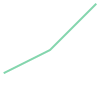

In [25]:
# createLineGeom takes a list of Shapely Point objects
# as parameter and returns a LineString object of those input points
def createLineGeom(list_point):
    lp = []
    for point in list_point:
        if type(point) == Point:
            lp.append(point)
        else:
            lp.append(Point(point))
    return LineString(lp)
        
# check with list of shapely Point
list_point = [point1, point2, point3]
line_geom_list_point = createLineGeom(list_point)
print(line_geom_list_point)
line_geom_list_point

# check with list of coordinate tuples
list_coord_tuples = [(1, 2), (3, 3), (5, 5)]
line_geom_coord_tuples = createLineGeom(list_coord_tuples)
print(line_geom_coord_tuples)
line_geom_coord_tuples

3. Create a function called `createPolyGeom()` that takes a list of coordinate tuples OR a list of Shapely Point objects and creates/returns a Polygon object of the input data. Both ways of passing the data to the function should be working. Demonstrate the usage of the function by passing data first with coordinate-tuples and then with Point objects.

POLYGON ((10 20, 40 50, -10 20, 10 20))
POLYGON ((1 2, 4 5, -1 2, 1 2))


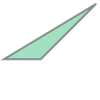

In [26]:
def createPolyGeom(list_of_points):
    if all(isinstance(x, Point) for x in list_of_points):
        return Polygon([p.x, p.y] for p in list_of_points)
    elif all(isinstance(x, tuple) for x in list_of_points):
        return Polygon(list_of_points)
    else:
        return

# first, pass data with coordinate tuples
coord_tuples = [(10, 20), (40, 50), (-10, 20), (10, 20)]
poly_tuples = createPolyGeom(coord_tuples)
print(poly_tuples)
poly_tuples

# second, pass data with point tuples
point_tuples = [Point(1, 2), Point(4, 5), Point(-1, 2), Point(1, 2)]
poly_point = createPolyGeom(point_tuples)
print(poly_point)
poly_point

#### Problem 2: Attributes of Geometries
1. Create a function called `getCentroid()` that takes any kind of Shapely's geometric object as input and returns a centroid of that geometry. Demonstrate the usage of the function.

In [27]:
def getCentroid(shape_object):
    return shape_object.centroid

# test for Point
point_test = Point(10, 20)
point_centroid = getCentroid(point_test)
print(point_centroid)

# test for LineString
# use the previously created line_geom_list_point
linestring_centroid = getCentroid(line_geom_list_point)
print(linestring_centroid)

# test for Polygon
# use the previously created poly_point
poly_centroid = getCentroid(poly_point)
print(poly_centroid)

POINT (10 20)
POINT (3.218270953309746 4.859135476654873)
POINT (1.333333333333333 3)


2. Create a function called `getArea()` that takes a Shapely's Polygon object as input and returns the area of that geometry. Demonstrate the usage of the function.

In [28]:
def getArea(polygon):
    return polygon.area

# demonstrate using poly_tuples
poly_area = getArea(poly_tuples)
print(poly_area)

300.0


3. Create a function called `getLength()` that takes either a Shapely's LineString or Polygon object as input. Function should check the type of the input and returns the length of the line if input is LineString and length of the exterior ring if input is Polygon. If something else is passed to the function, it should tell the user -> `"Error: LineString or Polygon geometries required!"`. Demonstrate the usage of the function.

In [29]:
def getLength(input_object):
    if type(input_object) == LineString:
        return input_object.length
    elif type(input_object) == Polygon:
        return input_object.exterior.length
    else:
        print("Error: LineString or Polygon geometries required!")
        return
    
# Demonstrate using previously created LineString: line_geom_list_point
line_len = getLength(line_geom_list_point)
print(line_len)

# Demonstrate using previously created Polygon: poly_tuples
poly_ext_len = getLength(poly_tuples)
print(poly_ext_len)

# Demonstrate using false input
false_len = getLength([(1,2), (2,3)])
print(false_len)

5.0197648378370845
120.73592581964586
Error: LineString or Polygon geometries required!
None


#### Problem 3: Reading coordinates from a file and creating a geometries
1. Save the `travelTimes_2015_Helsinki.txt` 
2. We will use only 4 columns, i.e. 'from_x', 'from_y', 'to_x', 'to_y' from the data
3. Iterate over the rows of our DataFrame and create Shapely Point objects for `orig_points` and `dest_points` representing the origin locations and destination locations of a travel row. Therefore, create two additional columns called `orig_points` and `dest_points` by applying a function that creates shapely points from the coordinates.

In [30]:
# load the data to a dataframe
helsinki_raw = 'travelTimes_2015_Helsinki.txt'
helsinki_df = pd.read_csv(helsinki_raw, sep=';', encoding='latin1')
print(helsinki_df.head(5))

   from_id    to_id      fromid_toid  route_number     at     from_x  \
0  5861326  5785640  5861326_5785640             1  08:10  24.970438   
1  5861326  5785641  5861326_5785641             1  08:10  24.970438   
2  5861326  5785642  5861326_5785642             1  08:10  24.970438   
3  5861326  5785643  5861326_5785643             1  08:10  24.970438   
4  5861326  5787544  5861326_5787544             1  08:10  24.970438   

      from_y       to_x       to_y  total_route_time  route_time  \
0  60.311917  24.856034  60.399941             125.0        99.0   
1  60.311917  24.860568  60.400014             123.0       102.0   
2  60.311917  24.865102  60.400086             125.0       103.0   
3  60.311917  24.869636  60.400159             129.0       107.0   
4  60.311917  24.842582  60.397478             118.0        92.0   

   route_distance  route_total_lines  
0         22917.6                2.0  
1         23123.5                2.0  
2         23241.3                2.0  
3 

In [31]:
# import numpy
import numpy as np

# createPoints is a function to make a Point object
# from x and y coordinates
def make_points(df):
    from_list = []
    to_list = []
    # iterate through every row in dataframe
    for _, row in df.iterrows():
        from_point = Point(row['from_x'], row['from_y'])
        to_point = Point(row['to_x'], row['to_y'])
        from_list.append(from_point)
        to_list.append(to_point)
    return from_list, to_list

# apply the make_points() to each row of helsinki_df
helsinki_df['orig_points'], helsinki_df['dest_points'] = make_points(helsinki_df)
print(helsinki_df.head(5))

   from_id    to_id      fromid_toid  route_number     at     from_x  \
0  5861326  5785640  5861326_5785640             1  08:10  24.970438   
1  5861326  5785641  5861326_5785641             1  08:10  24.970438   
2  5861326  5785642  5861326_5785642             1  08:10  24.970438   
3  5861326  5785643  5861326_5785643             1  08:10  24.970438   
4  5861326  5787544  5861326_5787544             1  08:10  24.970438   

      from_y       to_x       to_y  total_route_time  route_time  \
0  60.311917  24.856034  60.399941             125.0        99.0   
1  60.311917  24.860568  60.400014             123.0       102.0   
2  60.311917  24.865102  60.400086             125.0       103.0   
3  60.311917  24.869636  60.400159             129.0       107.0   
4  60.311917  24.842582  60.397478             118.0        92.0   

   route_distance  route_total_lines                    orig_points  \
0         22917.6                2.0  POINT (24.9704379 60.3119173)   
1         23123.

#### Problem 4: Creating LineStrings that represent the movements
1. Create an additional column called `lines`: Iterate over the dataframe again, row by row, and use the orign and destination fields from above and create a Shapely LineString object between the origin and destination point and add as a new column to our dataframe.
2. Find out what is the average Euclidean distance of all the origin-destination LineStrings that we just created and print it.

In [32]:
# create a function to calculate the LineString
def make_lineString(df):
    linestring_list = []
    for _, row in df.iterrows():
        line = LineString([row['orig_points'], row['dest_points']])
        linestring_list.append(line)
    return linestring_list

# modify the df
helsinki_df['lines'] = make_lineString(helsinki_df)
print(helsinki_df.head())

   from_id    to_id      fromid_toid  route_number     at     from_x  \
0  5861326  5785640  5861326_5785640             1  08:10  24.970438   
1  5861326  5785641  5861326_5785641             1  08:10  24.970438   
2  5861326  5785642  5861326_5785642             1  08:10  24.970438   
3  5861326  5785643  5861326_5785643             1  08:10  24.970438   
4  5861326  5787544  5861326_5787544             1  08:10  24.970438   

      from_y       to_x       to_y  total_route_time  route_time  \
0  60.311917  24.856034  60.399941             125.0        99.0   
1  60.311917  24.860568  60.400014             123.0       102.0   
2  60.311917  24.865102  60.400086             125.0       103.0   
3  60.311917  24.869636  60.400159             129.0       107.0   
4  60.311917  24.842582  60.397478             118.0        92.0   

   route_distance  route_total_lines                    orig_points  \
0         22917.6                2.0  POINT (24.9704379 60.3119173)   
1         23123.

In [33]:
# calc_euclid_distance is a function to calculate euclidean distance of LineStrings
def calcEuclidDistance(df):
    euclid_dist = []
    for _, row in df.iterrows():
        dist_len = row['lines'].length
        euclid_dist.append(dist_len)
    return euclid_dist
        
# create another column euclid distance
helsinki_df['euclid_distance'] = calcEuclidDistance(helsinki_df)
print(helsinki_df.head(5))

   from_id    to_id      fromid_toid  route_number     at     from_x  \
0  5861326  5785640  5861326_5785640             1  08:10  24.970438   
1  5861326  5785641  5861326_5785641             1  08:10  24.970438   
2  5861326  5785642  5861326_5785642             1  08:10  24.970438   
3  5861326  5785643  5861326_5785643             1  08:10  24.970438   
4  5861326  5787544  5861326_5787544             1  08:10  24.970438   

      from_y       to_x       to_y  total_route_time  route_time  \
0  60.311917  24.856034  60.399941             125.0        99.0   
1  60.311917  24.860568  60.400014             123.0       102.0   
2  60.311917  24.865102  60.400086             125.0       103.0   
3  60.311917  24.869636  60.400159             129.0       107.0   
4  60.311917  24.842582  60.397478             118.0        92.0   

   route_distance  route_total_lines                    orig_points  \
0         22917.6                2.0  POINT (24.9704379 60.3119173)   
1         23123.

In [37]:
# calculate the mean
print("The average Euclidean distance of all orig-dest pair is: ", helsinki_df['euclid_distance'].mean())

The average Euclidean distance of all orig-dest pair is:  0.2150222482322721
